In [166]:
# I played around with different numbers of estimators and different numbers of features, without ever boosting
# accuracy much over 84%

#From A. Muller https://github.com/amueller/mglearn/blob/master/mglearn/tools.py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
import pandas as pd
import os
%matplotlib inline

#set datadir based on cwd
cwd = os.getcwd()

#OSX
datadir = cwd + '/data/'
df = pd.read_csv(datadir+'data_clean.csv',index_col=0)
df.head()

#Windows
#datadir = cwd + '\\data\\'
#df = pd.read_csv(datadir+'data_clean.csv')

,gender,AgeAtFirst,OrderProtect,Housing,Age,MisdConviction,FelonyConviction,ViolentConviction,ViolentOffense,Gang,...,race_Black-Hispanic,race_Unknown,race_White,race_White-Hispanic,category_Felony,category_Infraction,category_Misdemeanor,category_Traffic Infraction,category_Unspecified,category_Violation
0,0,32.0,0,1,32.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,30.0,0,1,42.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,23.0,1,1,30.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,33.0,0,0,54.0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,18.0,0,1,24.0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [2]:
# added a random_state so we will get the same results each time we run
train_df = df.sample(frac=0.7, replace=False, random_state = 42)
test_df = df[~df.index.isin(train_df.index)]

#check if train_df and test_df overlap
len(train_df) + len(test_df) == len(df)

True

In [167]:
#Declare target variable, training data and testing data
target = 'NewArrest36'
train = train_df
test = test_df

#Set up X Y
X_train = train.drop(target, 1)
Y_train = train[target]
X_test = test.drop(target, 1)
Y_test = test[target]

In [168]:
# define our function for getting roc_auc 
from sklearn.metrics import roc_curve, auc, roc_auc_score

def AUCCal(preds, truth, label_string):
    '''
    preds is an nx1 array of predictions
    truth is an nx1 array of truth labels
    label_string is text to go into the plotting label
    '''
    
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)
    
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label = str(col) + ' (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    return roc_auc 

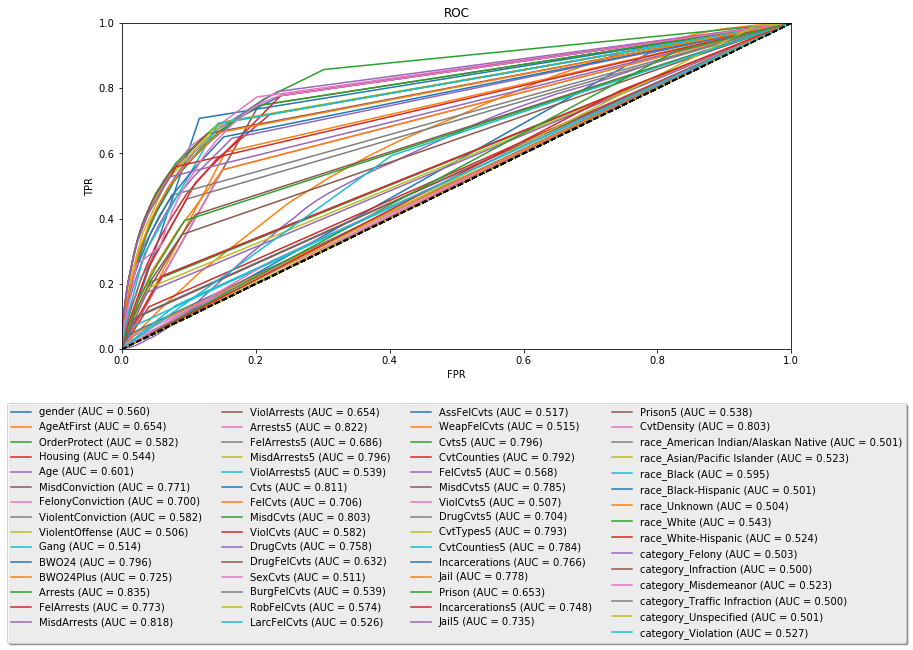

In [5]:
#Check auc scores for all features
featureset = list(X_train.columns.values)
feature_auc_dict = {}

fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

#create a plot and set some options
for col in X_train.columns:
    feature_auc_dict[col] = AUCCal(X_train[col],Y_train,col)
    
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")

# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

In [169]:
from sklearn.feature_selection import mutual_info_classif

#calculate mi for each feature 
feature_mi = mutual_info_classif(X_train,Y_train)
feature_mi_dict = dict(zip(X_train.columns.values, feature_mi))

#Add auc and mi each to a single dataframe
df_auc = pd.DataFrame(pd.Series(feature_auc_dict), columns = ['auc'])
df_mi = pd.DataFrame(pd.Series(feature_mi_dict), columns = ['mi'])   

#Now merge the two on the feature name
feat_imp_df = df_auc.merge(df_mi, left_index = True, right_index = True)

In [170]:
# take a look
feat_imp_df

,auc,mi
Age,0.600658,0.022532
AgeAtFirst,0.653887,0.036829
Arrests,0.835257,0.196561
Arrests5,0.821658,0.199437
AssFelCvts,0.517163,0.008871
BWO24,0.795776,0.194336
BWO24Plus,0.724702,0.108993
BurgFelCvts,0.538777,0.018359
CvtCounties,0.791601,0.157439
CvtCounties5,0.783608,0.168010


In [15]:
'''This is code from before; what I have below is similar, but it creates a variety of featuresets

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
feat_ranks = feat_imp_df.rank(axis = 0, ascending = False)

num_of_features = [5, 10, 20, 30, len(feat_ranks)]

for num in num_of_features:
    featureset = 

featureset_1 = list(feat_ranks[(feat_ranks.auc <= 20)].index.values)

X_train_1 = X_train[featureset_1]
X_test_1 = X_test[featureset_1]

rf_def = RandomForestClassifier(criterion='entropy')
rf_def = rf_def.fit(X_train_1, Y_train)
rf_pred =rf_def.predict_proba(X_test_1)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, rf_pred)
roc_auc = auc(fpr, tpr)

accuracy = rf_def.score(X_test_1, Y_test)
'''

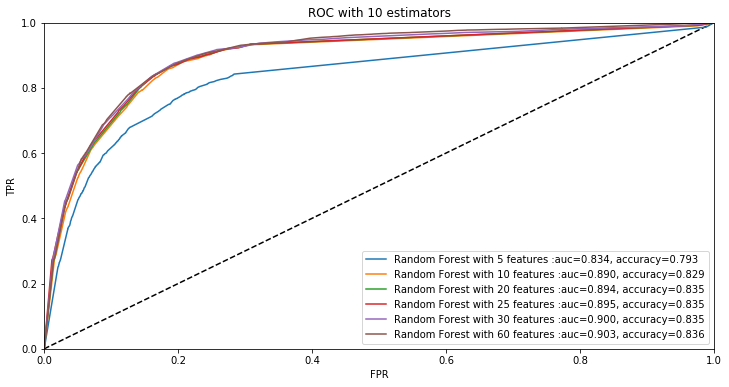

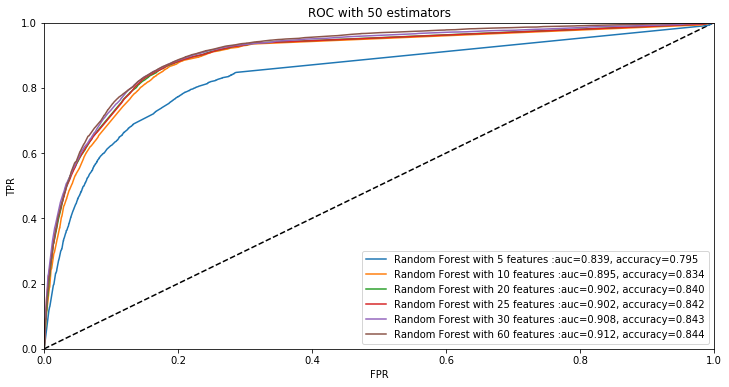

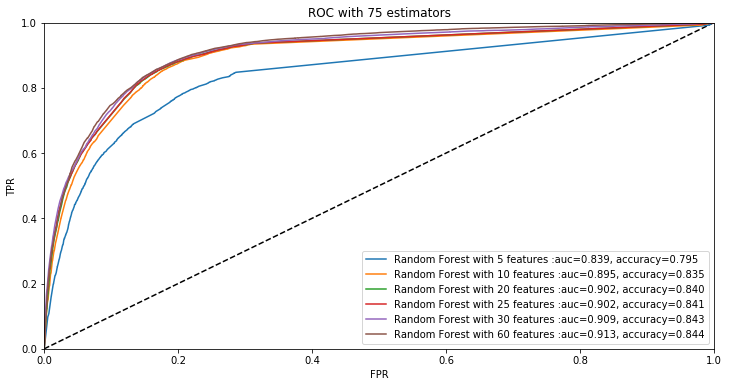

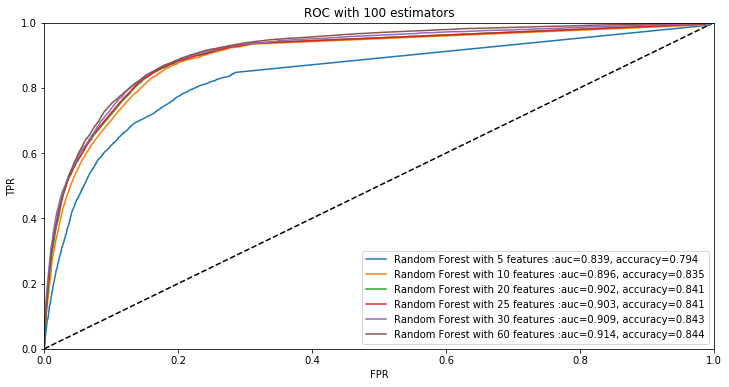

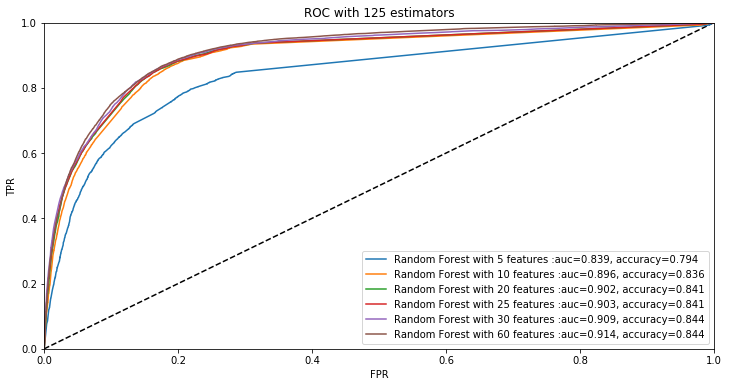

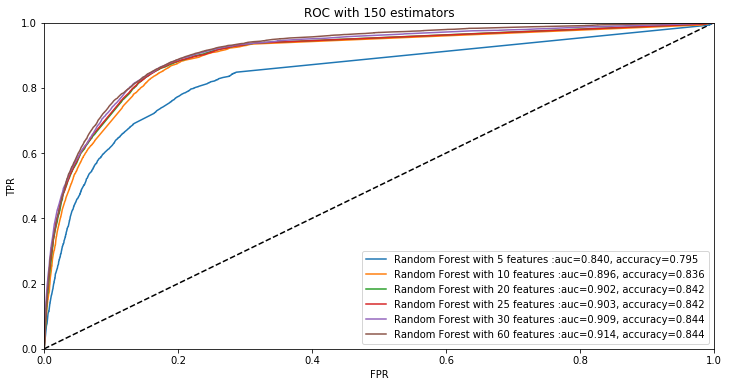

,10,50,75,100,125,150
5,"(0.833906270894, 0.792629189478)","(0.83895308753, 0.794665509414)","(0.839307566489, 0.79496595006)","(0.839248243188, 0.794498597944)","(0.839328803315, 0.79446521565)","(0.839505430819, 0.79479903859)"
10,"(0.890108601053, 0.829383095206)","(0.895453188467, 0.834023234077)","(0.895411423173, 0.83512484978)","(0.895735110591, 0.83495793831)","(0.895748576374, 0.835759113366)","(0.895790132645, 0.835825877954)"
20,"(0.893799728262, 0.834891173721)","(0.901666223668, 0.839831753238)","(0.901540656053, 0.840365869943)","(0.90204197429, 0.841233809587)","(0.902130658479, 0.841467485646)","(0.902428315457, 0.84200160235)"
25,"(0.895058558343, 0.835091467486)","(0.901525785165, 0.841901455468)","(0.902117764028, 0.841300574175)","(0.902569299743, 0.841467485646)","(0.90267801771, 0.841267191881)","(0.902802523948, 0.842068366938)"
30,"(0.899793441669, 0.835091467486)","(0.907707738514, 0.843470423287)","(0.908651265357, 0.843303511817)","(0.909126311614, 0.843470423287)","(0.909191020763, 0.843804246228)","(0.909381903696, 0.844138069168)"
60,"(0.902860948445, 0.836226465483)","(0.912246896521, 0.843770863934)","(0.913243633877, 0.843670717052)","(0.91381394393, 0.843837628522)","(0.914072339255, 0.844104686874)","(0.914231457525, 0.843837628522)"


In [122]:
'''
https://www.researchgate.net/publication/230766603_How_Many_Trees_in_a_Random_Forest
'''

import numpy as np
import pandas as pd

# This will store the various values for n_estimators and feature_set
forest_parameters_dict = {}

# different number of features, number of different estimators
num_of_features = [5, 10, 20, 25, 30, len(feat_ranks)]
n_estimates = [10, 50, 75, 100, 125, 150]

for est in n_estimates:
        
    # set up the classifier using a certain number of estimators
    rf_def = RandomForestClassifier(criterion='entropy', n_estimators = est, random_state = 42)
        
    # plotting
    fig = plt.figure(figsize = (12, 6))
    ax = plt.subplot(111)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC with %i estimators" % est)

    num_of_features_dict = {}
    
    for num in num_of_features:
        
        # determines how many of the top 'num' features we will use
        featureset = list(feat_ranks[(feat_ranks.auc <= num)].index.values)
        
        # the limited training and test sets using only those features
        X_train_lim = X_train[featureset]
        X_test_lim = X_test[featureset]
        
        # fit and predict and calculate accuracy for this number of features
        rf_def_fit = rf_def.fit(X_train_lim, Y_train)
        rf_pred =rf_def_fit.predict_proba(X_test_lim)[:, 1]
        fpr, tpr, thresholds = roc_curve(Y_test, rf_pred)
        roc_auc = auc(fpr, tpr)
        accuracy = rf_def.score(X_test_lim, Y_test)
        
        # store it
        num_of_features_dict[num] = (roc_auc, accuracy) 

        # plot it
        plt.plot(fpr,tpr,label="Random Forest with %i features :auc=%.3f, accuracy=%.3f" % (num, roc_auc, accuracy))
    
    # store the num_of_feat scores in the estimators dict
    forest_parameters_dict[est] = num_of_features_dict
    
    plt.legend(loc="lower right")
    plt.show()

In [165]:
# The result is that we never really get much more than 84% accuracy, no matter when we use all the features and use 
# a lot of estimators. So we should probably keep n_estimators relatively low (for computational reasons)
# and keep the number of reatures low, as in the LR, for interpretability reasons

# It would be trivial to make a nice plot of accuracy and auc for these different parameters, but I haven't gotten
# around to this yet

# plot the accuracy and the rocs for the various num_features (the rows) and 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(forest_parameters_dict)
df

,10,50,75,100,125,150
5,"(0.833906270894, 0.792629189478)","(0.83895308753, 0.794665509414)","(0.839307566489, 0.79496595006)","(0.839248243188, 0.794498597944)","(0.839328803315, 0.79446521565)","(0.839505430819, 0.79479903859)"
10,"(0.890108601053, 0.829383095206)","(0.895453188467, 0.834023234077)","(0.895411423173, 0.83512484978)","(0.895735110591, 0.83495793831)","(0.895748576374, 0.835759113366)","(0.895790132645, 0.835825877954)"
20,"(0.893799728262, 0.834891173721)","(0.901666223668, 0.839831753238)","(0.901540656053, 0.840365869943)","(0.90204197429, 0.841233809587)","(0.902130658479, 0.841467485646)","(0.902428315457, 0.84200160235)"
25,"(0.895058558343, 0.835091467486)","(0.901525785165, 0.841901455468)","(0.902117764028, 0.841300574175)","(0.902569299743, 0.841467485646)","(0.90267801771, 0.841267191881)","(0.902802523948, 0.842068366938)"
30,"(0.899793441669, 0.835091467486)","(0.907707738514, 0.843470423287)","(0.908651265357, 0.843303511817)","(0.909126311614, 0.843470423287)","(0.909191020763, 0.843804246228)","(0.909381903696, 0.844138069168)"
60,"(0.902860948445, 0.836226465483)","(0.912246896521, 0.843770863934)","(0.913243633877, 0.843670717052)","(0.91381394393, 0.843837628522)","(0.914072339255, 0.844104686874)","(0.914231457525, 0.843837628522)"


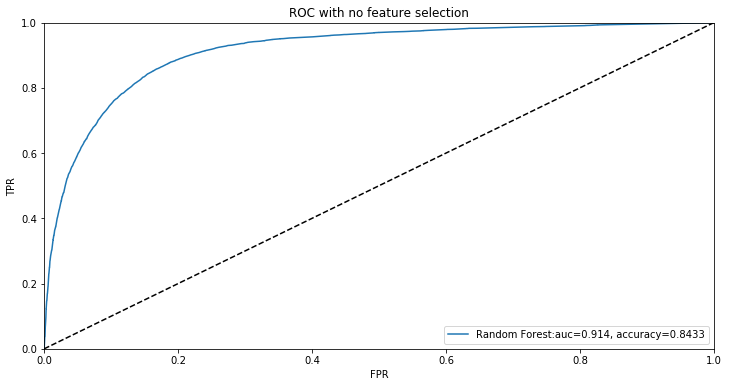

In [171]:
# Note that with no feature-selectiona and 100 estimators, we get basically about as good as anything else

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

# leave X_train just as it was

rf_def = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_def_RL = rf_def.fit(X_train, Y_train)
rf_pred_RL = rf_def_RL.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, rf_pred)
roc_auc = auc(fpr, tpr)
accuracy = rf_def.score(X_test, Y_test)

#Plotting
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

plt.plot(fpr,tpr,label="Random Forest:auc=%.3f, accuracy=%.4f" % (roc_auc,accuracy))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC with no feature selection")
plt.legend(loc="lower right")
plt.show()

